<a href="https://colab.research.google.com/github/googspell/Notes/blob/main/EDA%2C%D0%A0%D0%90%D0%97%D0%92%D0%95%D0%94%D0%9E%D0%A7%D0%9D%D0%AB%D0%99_%D0%98_%D0%9F%D0%95%D0%A0%D0%92%D0%98%D0%A7%D0%9D%D0%AB%D0%99_%D0%90%D0%9D%D0%90%D0%9B%D0%98%D0%97_%D0%94%D0%90%D0%9D%D0%9D%D0%AB%D0%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import norm
from tqdm.auto import tqdm
from statsmodels.stats.power import tt_ind_solve_power
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import shuffle
import scipy.stats as stats
import pylab
import scipy.stats as stats
import statsmodels.stats.api as sms
from tqdm.notebook import tqdm
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
import plotly.express as px
import plotly.graph_objects as go
import plotly
!pip install circlify
import circlify
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.cluster import KMeans
!pip install bertopic
from bertopic import BERTopic
! pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.9 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039179 sha256=dd07df45c3e753c21b62ce3952191ceaafd04a3e7034dc667eed1f1c5a91cdd3
  Stored in dir

Разведочный анализ данных (Exploratory Data Analysis, EDA) — это процесс исследования и анализа данных с целью извлечения полезной информации и обнаружения закономерностей и трендов, которые могут быть использованы в дальнейшем исследовании.

EDA включает в себя исследование структуры данных, проверку наличия пропущенных значений, анализ распределения данных, определение выбросов, корреляций и зависимостей между переменными.

В рамках исследования необходимо:
исследовать данные

*   исследовать данные

*   выполнить сегментацию по пользователям и найти инсайты

*   выделить категории товаров и найти инсайты

In [ ]:
#download_data
! gdown --id 1mJjepHoxV3f3eDxjxSvCvxvcibBS2qpx
online_reatail_data = pd.read_excel('/content/online_retail_II.xlsx')
online_reatail_data.head()

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1mJjepHoxV3f3eDxjxSvCvxvcibBS2qpx
From (redirected): https://drive.google.com/uc?id=1mJjepHoxV3f3eDxjxSvCvxvcibBS2qpx&confirm=t&uuid=a447f891-2cbf-4e18-9eef-dcc0497582e3
To: /content/online_retail_II.xlsx
100% 45.6M/45.6M [00:00<00:00, 56.9MB/s]


NameError: name 'pd' is not defined

In [ ]:
# data information
online_reatail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


*в сете отстутствуют NaN значения*

In [ ]:
# check missing values
online_reatail_data.isna().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

#Исследовательский анализ данных

Изучение истории покупок

Общие метрики: общее количество покупателей, общее количество товаров, среднее
количество заказов на одного покупателя, средний чек, среднее количество единиц товара при одной покупке.

In [ ]:
display(online_reatail_data.describe().T)
display(online_reatail_data.describe(include = ['object']).T)

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,10.337667,107.424110,-9600.00,1.00,3.0,10.00,19152.00
Price,525461.0,4.688834,146.126914,-53594.36,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.00,13983.00,15311.0,16799.00,18287.00


,count,unique,top,freq
Invoice,525461,28816,537434,675
StockCode,525461,4632,85123A,3516
Description,522533,4681,WHITE HANGING HEART T-LIGHT HOLDER,3549
Country,525461,40,United Kingdom,485852


Минимальное количество купленных товаров одним клиентом минус 9600 шт., а максимальное - 191512. Минимальная цена за товар минус 53594., максимальная - 25 111. Наибольшей популярностью пользуется товар "WHITE HANGING HEART T-LIGHT HOLDER", его купили 3549 раз из 4681 покупок за рассматриваемый период. Количество стран 40,большего всего покупок в UK
Видим первую проблему с данными. Цена и количество не может быть отрицательными. Удалим данные значения. Также приведм значения Description к нижнему регистру для удобства дальнешего анализа



In [ ]:
print('Общее количество уникальных покупателей: {:.0f}'.format(len(online_reatail_data['Customer ID'].unique())))
print('Общее количество уникальных товаров: {:.0f}'.format(len(online_reatail_data['Description'].unique())))
print('Количество уникальных заказов: {:.0f}'.format(len(online_reatail_data['Invoice'].unique())))
print('Количество уникальных стран: {:.0f}'.format(len(online_reatail_data['Country'].unique())))

Общее количество уникальных покупателей: 4384
Общее количество уникальных товаров: 4682
Количество уникальных заказов: 28816
Количество уникальных стран: 40


In [ ]:
#del negativ_numbers
online_reatail_data['Quantity'] = online_reatail_data['Quantity'].clip(lower=0)
online_reatail_data['Price'] = online_reatail_data['Price'].clip(lower=0)
#reg
online_reatail_data['Description']=online_reatail_data['Description'].str.lower()

In [ ]:
display(online_reatail_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
Quantity,525461.0,11.440598,91.894795,0.0,1.00,3.0,10.00,19152.00
Price,525461.0,4.948705,96.492886,0.0,1.25,2.1,4.21,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.0,13983.00,15311.0,16799.00,18287.00


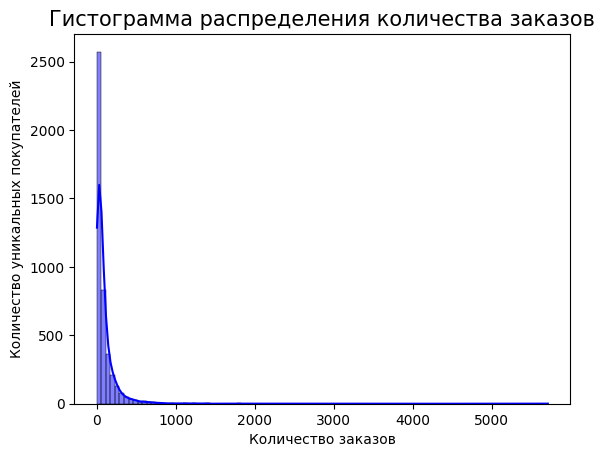

In [ ]:
#гистограмма распределения заказов
orders_per_buyer = online_reatail_data.groupby('Customer ID').agg({'Invoice':'count'})
plt.title('Гистограмма распределения количества заказов', size = 15)
sns.histplot(data = orders_per_buyer, x='Invoice', kde=True, bins=100, color='blue')
plt.xlabel('Количество заказов')
plt.ylabel('Количество уникальных покупателей')
plt.show()

Видим, что распределение количества заказов не выглядит как нормальное, поэтому будем использовать как меру медиану.


In [ ]:
print('Cреднее количество заказов на одного покупателя: {:.0f} шт.'.format(orders_per_buyer['Invoice'].median()))

Cреднее количество заказов на одного покупателя: 44 шт.


Для анализа данных по месяцам нам необходимо выделить из даты заказа только месяц,а также посчитать итоговую сумму как цена на количество,плюс добавим год

In [ ]:
online_reatail_data['total_price'] = online_reatail_data['Quantity'] * online_reatail_data['Price']
online_reatail_data['month'] = online_reatail_data['InvoiceDate'].dt.month
online_reatail_data['year'] = online_reatail_data['InvoiceDate'].dt.year

In [ ]:
online_reatail_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price,month,year
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,2009
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,2009
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,feltcraft doll rosie,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,2010
525457,538171,22750,feltcraft princess lola doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525458,538171,22751,feltcraft princess olivia doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525459,538171,20970,pink floral feltcraft shoulder bag,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,2010


In [ ]:
grouped_by_orders = online_reatail_data.groupby(['Customer ID', 'Invoice'])\
.agg({'InvoiceDate':'first', 'Description':'count', 'Quantity':'sum','Price':'mean', 'total_price':'sum'}).reset_index()\
.rename(columns={'date':'first_date_order', 'Description':'cnt_unique_products_in_order',
                 'Quantity':'total_cnt_goods_in_order', 'Price':'avg_product_price', 'total_price':'order_price'})

grouped_by_customers = grouped_by_orders.groupby('Customer ID')\
.agg({'Invoice':'nunique', 'cnt_unique_products_in_order':'mean', 'total_cnt_goods_in_order':'mean',
      'avg_product_price':'mean', 'order_price':['sum','mean']}).reset_index()

grouped_by_customers.columns = ['Customer ID', 'cnt_orders', 'avg_products_in_order', 'avg_goods_in_order',
                                'avg_product_price', 'total_revenue', 'avg_order_price']

In [ ]:
print('Cредняя выручка с одного покупателя: {:.0f} у.е.'.format(grouped_by_customers['total_revenue'].median()))
print('Cредняя сумма заказа: {:.0f} у.е.'.format(grouped_by_customers['avg_order_price'].median()))
print('Cреднее число позиций товаров в заказах: {:.0f} шт.'.format(grouped_by_customers['avg_products_in_order'].median()))
print('Cреднее число единиц товаров в заказах: {:.0f} шт.'.format(grouped_by_customers['avg_goods_in_order'].median()))

Cредняя выручка с одного покупателя: 680 у.е.
Cредняя сумма заказа: 236 у.е.
Cреднее число позиций товаров в заказах: 15 шт.
Cреднее число единиц товаров в заказах: 128 шт.


In [ ]:
grouped_by_customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,4383.0,15350.611453,1700.737934,12346.0,13880.500000,15354.000000,16837.000000,18287.00
cnt_orders,4383.0,5.381474,10.051921,1.0,1.000000,3.000000,6.000000,270.00
avg_products_in_order,4383.0,19.352820,17.636976,1.0,8.091912,14.833333,25.000000,248.00
avg_goods_in_order,4383.0,215.524705,1431.638945,0.0,74.291667,128.000000,217.000000,87167.00
avg_product_price,4383.0,26.191287,457.731951,0.0,2.381667,3.277773,4.562656,25111.09
total_revenue,4383.0,2015.058926,8845.748042,0.0,297.850000,679.800000,1697.975000,349164.35
avg_order_price,4383.0,314.705352,404.422589,0.0,153.060000,235.587500,357.357000,11880.84


In [ ]:
print('Средний чек по всем покупателям: {:.0f} у.е.'\
      .format((grouped_by_customers['total_revenue']/grouped_by_customers['cnt_orders']).median()))

Средний чек по всем покупателям: 236 у.е.


За рассматриваемый период времени в данных превалируют покупатели, совершившие от 1 до 6 заказов.Cредняя выручка с одного покупателя составляет 655, а средняя сумма заказа - 230. Средний чек по всем покупателям составляет 236. Видим,что у магазина имеется лояльные и постоянные клиенты которые могут совершать повторные покупки.



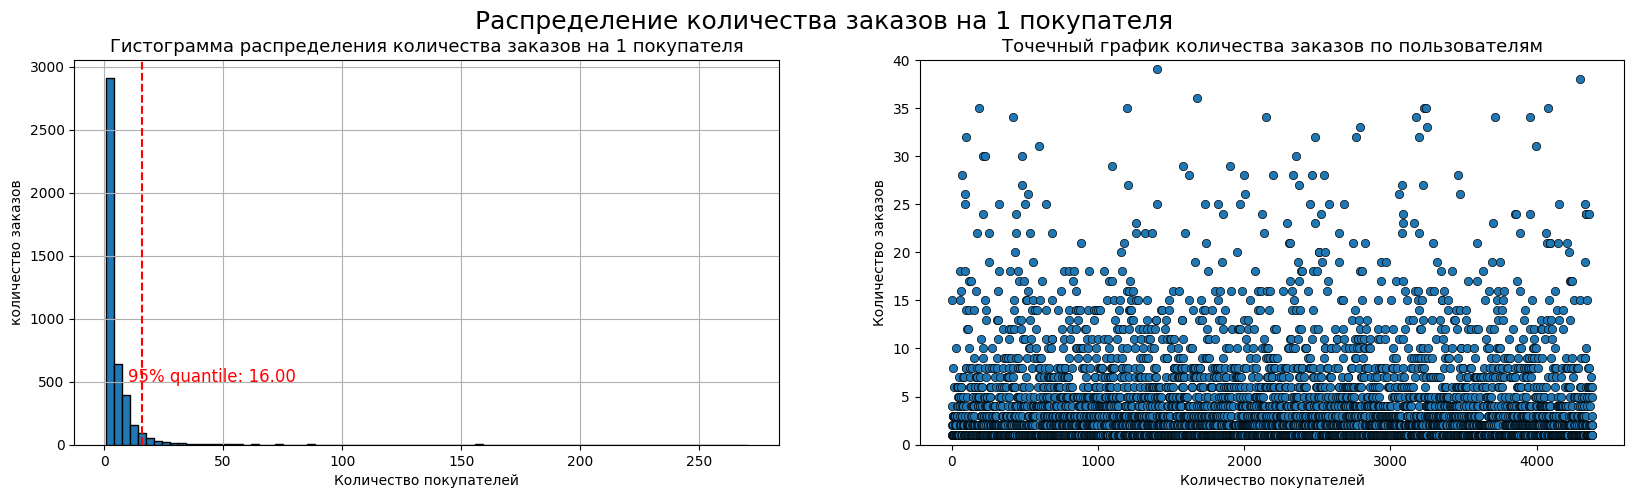

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Распределение количества заказов на 1 покупателя', size=18)

#Построение гистограммы
grouped_by_customers['cnt_orders'].hist(bins=80, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения количества заказов на 1 покупателя', size=13)
axs[0].set_xlabel('Количество покупателей')
axs[0].set_ylabel('количество заказов')
axs[0].axvline(x=grouped_by_customers['cnt_orders'].quantile(.95), c='r', linestyle='--')
axs[0].text(s='95% quantile: {:.2f}'.format(grouped_by_customers['cnt_orders'].quantile(.95)),
          x=10, y=500, size=12, color='r')

x_values = pd.Series(range(0,len(grouped_by_customers)))
sns.scatterplot(x=x_values, y=grouped_by_customers['cnt_orders'], edgecolor='black')
axs[1].set_title('Точечный график количества заказов по пользователям', size=13)
axs[1].set_xlabel('Количество покупателей')
axs[1].set_ylabel('Количество заказов')
axs[1].set_ylim(0,40)
plt.show()

На графиках видим наличие выбросов в распределении количества заказов на одного покупателя. В основном клиенты совершают до 16 покупок, оставльное - выбросы. 95% квантиль равен 16 покупкам.

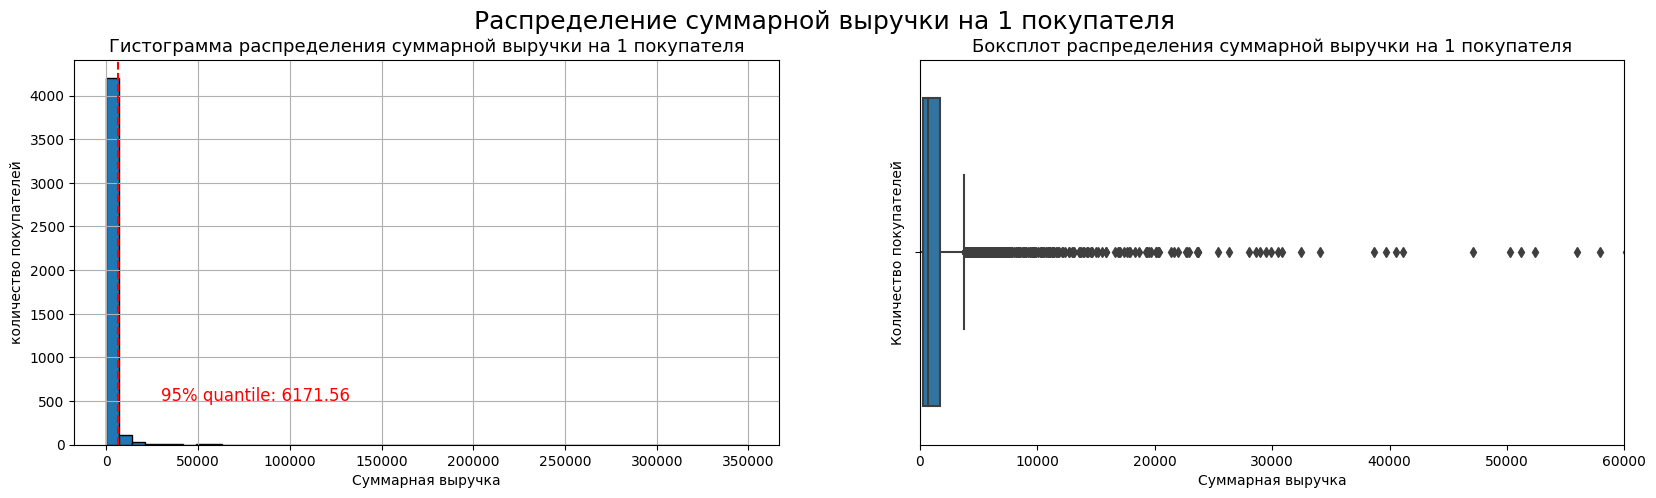

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
plt.suptitle('Распределение суммарной выручки на 1 покупателя', size=18)

#Построение гистограммы
grouped_by_customers['total_revenue'].hist(bins=50, edgecolor='black', ax=axs[0])
axs[0].set_title('Гистограмма распределения суммарной выручки на 1 покупателя', size=13)
axs[0].set_xlabel('Суммарная выручка')
axs[0].set_ylabel('количество покупателей')
axs[0].axvline(x=grouped_by_customers['total_revenue'].quantile(.95), c='r', linestyle='--')
axs[0].text(s='95% quantile: {:.2f}'.format(grouped_by_customers['total_revenue'].quantile(.95)),
          x=30000, y=500, size=12, color='r')

# Построение боксплота
sns.boxplot(x='total_revenue', data=grouped_by_customers, ax=axs[1])
axs[1].set_title('Боксплот распределения суммарной выручки на 1 покупателя', size=13)
axs[1].set_xlabel('Суммарная выручка')
axs[1].set_ylabel('Количество покупателей')
axs[1].set_xlim(0, 60000)
plt.show()



На графиках видим наличие выбросов в распределении количества суммарной выручки с одного покупателя. В основном клиенты покупают товары на сумму до 6171, остальное - выбросы. 95% квантиль равен 6171.


In [ ]:
print('90, 95 и 99 перцентили количества заказов:', np.percentile(grouped_by_customers['cnt_orders'], [90, 95, 99]))

90, 95 и 99 перцентили количества заказов: [12.   16.   36.36]




Не более 5% пользователей совершили больше 16 и не более 1% больше 36. Пусть граница аномальных значений проходит в диапазоне свыше 36 покупок.


In [ ]:
print('90, 95 и 99 перцентили количества заказов:', np.percentile(grouped_by_customers['total_revenue'], [90, 95, 99]))

90, 95 и 99 перцентили количества заказов: [ 3734.326  6171.56  20121.085]


Не более 5% пользователей совершили покупки дороже 6171. и не более 1% дороже 20121. Пусть граница аномальных значений проходит в диапазоне свыше 20121


In [ ]:
abnormal_orders_users = grouped_by_customers[grouped_by_customers['cnt_orders']>np.percentile(grouped_by_customers['cnt_orders'], 99)].index.to_list()
abnormal_revenue_users = grouped_by_customers[grouped_by_customers['total_revenue']>np.percentile(grouped_by_customers['total_revenue'], 99)].index.to_list()
abnormal_users = pd.concat([pd.Series(abnormal_orders_users), pd.Series(abnormal_revenue_users)]).to_list()

In [ ]:
print('Количество покупателей с аномально большой выручкой: {}'.format(len(abnormal_revenue_users)))
print('Количество покупателей с аномально большим количеством заказов: {}'.format(len(abnormal_orders_users)))

Количество покупателей с аномально большой выручкой: 44
Количество покупателей с аномально большим количеством заказов: 44


In [ ]:
#Отфильтруем датафрейм по аномальным пользователям
grouped_by_customers_filtered = grouped_by_customers.loc[~(grouped_by_customers['total_revenue'] > 20121),:]
df_filtered = online_reatail_data[online_reatail_data['Customer ID'].isin(grouped_by_customers_filtered['Customer ID'])]
ordersByUsers_filtered = grouped_by_customers[grouped_by_customers['cnt_orders'] <= 36]
df_filtered = df_filtered[df_filtered['Customer ID'].isin(ordersByUsers_filtered['Customer ID'])]

In [ ]:
grouped_by_date = df_filtered.groupby('month').agg({'Customer ID':'nunique', 'total_price':'sum'}).reset_index()\
.rename(columns={'Customer ID':'cnt_buyers', 'total_price':'revenue'})
fig = px.line(grouped_by_date, x="month", y="revenue")
fig.update_layout(
    title='Помесячная динамика выручки',
    xaxis_title='Месяц',
    yaxis_title='Выручка')
fig.show()

In [ ]:
fig = px.line(grouped_by_date, x="month", y="cnt_buyers")
fig.update_layout(
    title='Помесячная динамика количества покупателей',
    xaxis_title='Месяц',
    yaxis_title='Кол-во покупателей')
fig.show()

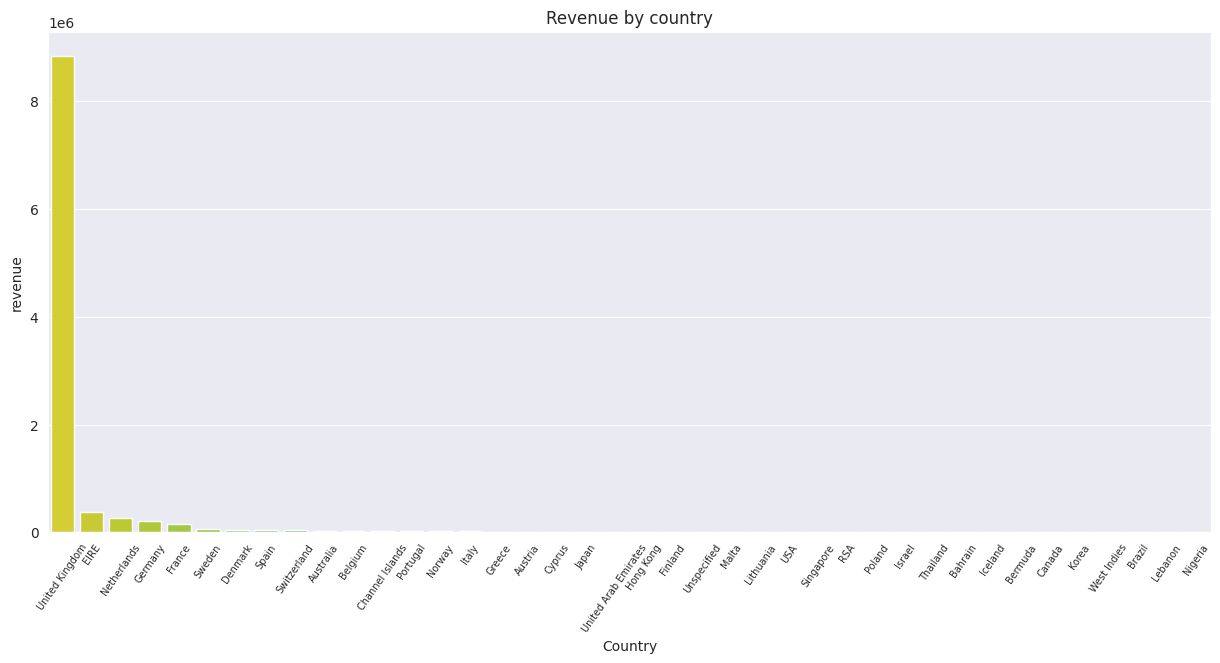

In [ ]:
##Выручка по странам
d = online_reatail_data.groupby('Country')['total_price'].sum().reset_index().rename(columns={'total_price':'revenue'}).sort_values(by='revenue', ascending=False)
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=d, x='Country', y='revenue', palette='viridis_r')
g.set_title('Revenue by country')
g.set_xticklabels(d['Country'], rotation=55, fontdict={'fontsize':7})
plt.show()

In [ ]:
##Топ 10 наиболее продаваемые товары
m = online_reatail_data.groupby(['Description'])[['Quantity']].sum().reset_index().sort_values(by='Quantity', ascending=False).nlargest(10,'Quantity')
print(m)

                             Description  Quantity
4477  white hanging heart t-light holder     58793
4585   world war 2 gliders asstd designs     55202
723                  brocade ring purse      48384
2791    pack of 72 retro spot cake cases     46755
285        assorted colour bird ornament     45356
144          60 teatime fairy cake cases     36502
2789  pack of 60 pink paisley cake cases     31940
2195             jumbo bag red retrospot     30807
4039                small popcorn holder     29824
4132      strawberry ceramic trinket box     27128


                              Description    revenue
2439                               manual  262992.08
3420             regency cakestand 3 tier  170078.51
4477   white hanging heart t-light holder  160630.78
1333                       dotcom postage  116408.71
285         assorted colour bird ornament   73092.99
2827      paper chain kit 50's christmas    58189.25
2195              jumbo bag red retrospot   56595.51
2841                        party bunting   49682.72
3214                              postage   49477.54
3543  rotating silver angels t-light hldr   47985.09


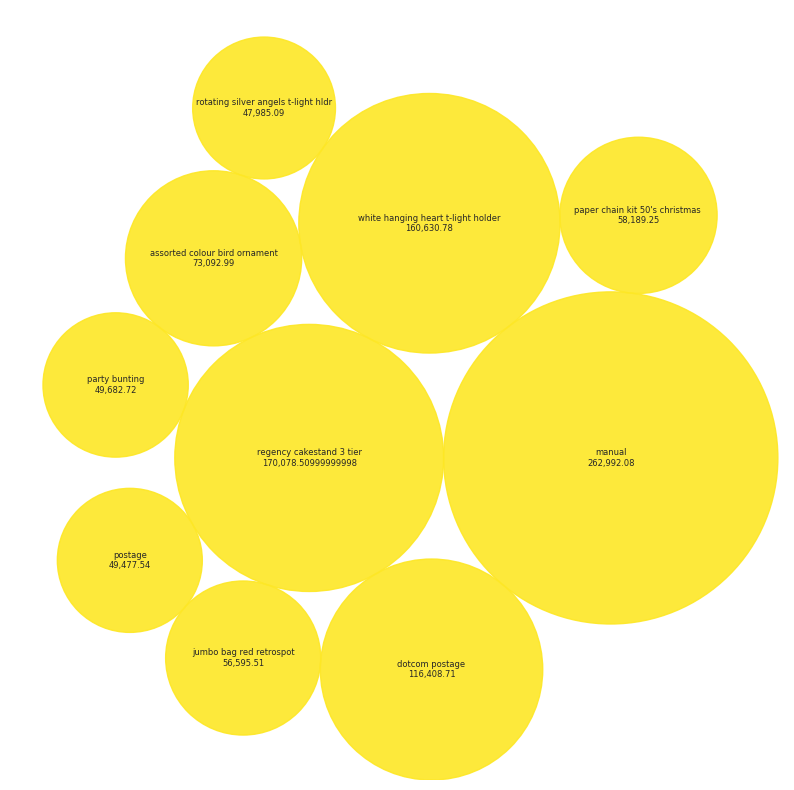

In [ ]:
##Топ 10 товаров приносящие большую выручку
grouped = online_reatail_data.groupby(['Description'])[['total_price']].sum().reset_index().rename(columns={'total_price':'revenue'}).sort_values(by='revenue', ascending=False).nlargest(10,'revenue')
print(grouped)
#фнукция подбора цвета
def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

pal_vi = get_color('viridis_r', len(online_reatail_data))

# compute circle positions:
circles = circlify.circlify(grouped['revenue'].tolist(),show_enclosure=False,target_enclosure=circlify.Circle(x=0, y=0, r=1))
circles.reverse()
#Нарисуем круг, упакованный кругами.
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
# Рисуем круги
for circle, label, emi, color in zip(circles, grouped['Description'], grouped['revenue'],pal_vi):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color))
    plt.annotate(label +'\n'+ format(emi, ","), (x,y), size=6, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

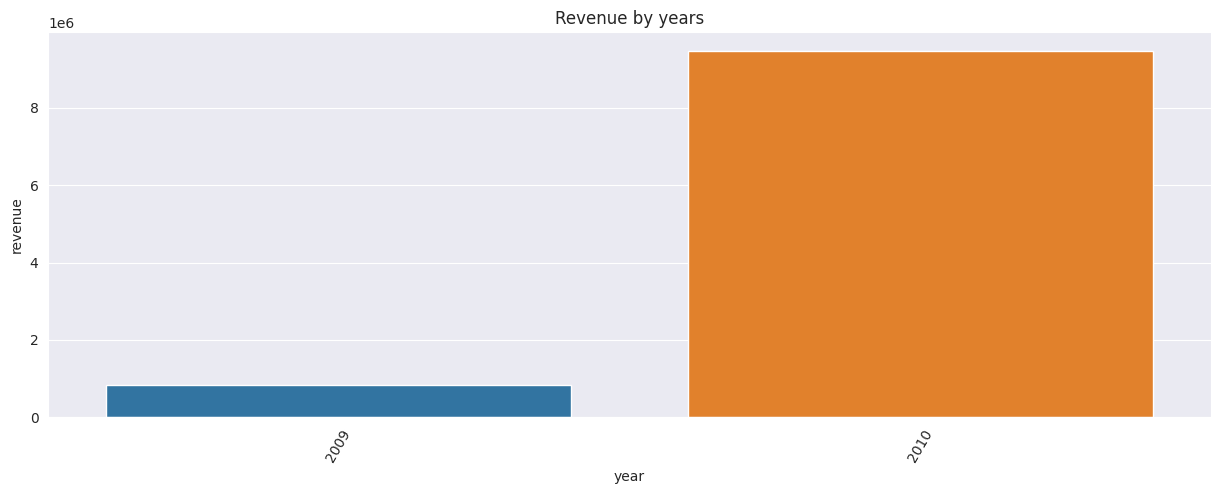

In [ ]:
##Выручка по годам
t = online_reatail_data.groupby('year')['total_price'].sum().reset_index().rename(columns={'total_price':'revenue'})
plt.figure(figsize=(15,5))
ax=sns.barplot(x='year', y='revenue',data=t)
ax.set_title('Revenue by years')
plt.xticks(rotation=60,size=10)
plt.show()

**Вывод:** получили метрики: общее количество покупателей, общее количество товаров, среднее количество заказов на одного покупателя, средний чек, среднее количество единиц товара при одной покупке.Большая часть выручки приходится на 2010 год. Определили наиболее значимые страны по выручке: UK, EIRE, Netherlands, Germany, France. Определили наиболее значимые товары в выручке, и наиболее продаваемые товары. Пиковые значения по выручки приходятся на 11 месяц, также совпадают с количеством покупателей. Наблюдается рост выручки с (8 месяца) августа до ноября (11 месяца).

#Кластеризация пользователей

Выполним кластеризацию по пользователям. Для этой цели воспользуемся 2 наиболее распостраненными методами кластеризации.

Иерархическая кластеризация, как следует из названия, представляет собой алгоритм, который строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер. Результат иерархической кластеризации может быть представлен с помощью дендрограммы.

k-средние - это метод кластерного анализа с использованием заранее заданного количества кластеров. Он требует предварительного знания ‘K’, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

In [ ]:
df_filtered

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price,month,year
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,2009
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,2009
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,feltcraft doll rosie,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,2010
525457,538171,22750,feltcraft princess lola doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525458,538171,22751,feltcraft princess olivia doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525459,538171,20970,pink floral feltcraft shoulder bag,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,2010


In [ ]:
grouped_by_orders = df_filtered.groupby(['Customer ID', 'Invoice'])\
.agg({'InvoiceDate':'first', 'Description':'count', 'Quantity':'sum','Price':'mean', 'total_price':'sum'}).reset_index()\
.rename(columns={'date':'first_date_order', 'Description':'cnt_unique_products_in_order',
                 'Quantity':'total_cnt_goods_in_order', 'Price':'avg_product_price', 'total_price':'order_price'})

grouped_by_customers = grouped_by_orders.groupby('Customer ID')\
.agg({'Invoice':'nunique', 'cnt_unique_products_in_order':'mean', 'total_cnt_goods_in_order':'mean',
      'avg_product_price':'mean', 'order_price':['sum','mean']}).reset_index()

grouped_by_customers.columns = ['Customer ID', 'cnt_orders', 'avg_products_in_order', 'avg_goods_in_order',
                                'avg_product_price', 'total_revenue', 'avg_order_price']

In [ ]:
grouped_by_customers

,Customer ID,cnt_orders,avg_products_in_order,avg_goods_in_order,avg_product_price,total_revenue,avg_order_price
0,12346.0,15,3.066667,4.666667,12.346667,372.86,24.857333
1,12347.0,2,35.500000,414.000000,2.362000,1323.32,661.660000
2,12348.0,1,20.000000,373.000000,0.719500,222.16,222.160000
3,12349.0,4,26.750000,248.250000,54.450273,2671.14,667.785000
4,12351.0,1,21.000000,261.000000,2.355238,300.93,300.930000
...,...,...,...,...,...,...,...
4316,18283.0,6,38.333333,56.000000,2.460011,641.77,106.961667
4317,18284.0,2,14.500000,247.000000,14.126607,461.68,230.840000
4318,18285.0,1,12.000000,145.000000,8.350000,427.00,427.000000
4319,18286.0,3,23.333333,202.666667,5.914784,1296.43,432.143333


In [ ]:
#выберем колонки по которым будем производить кластеризацию. Исходим,из того что лучший показатель для кластеризации пользователей это выручку которую приносят,средний чек заказа,средняя стоимость продуктов)
col=['total_revenue', 'avg_order_price', 'avg_product_price']

In [ ]:
pd.options.mode.chained_assignment = None
grouped_by_customers[col].fillna(0, inplace=True) # заменим пропуски данных нулями, в противном случае выдаст ошибку

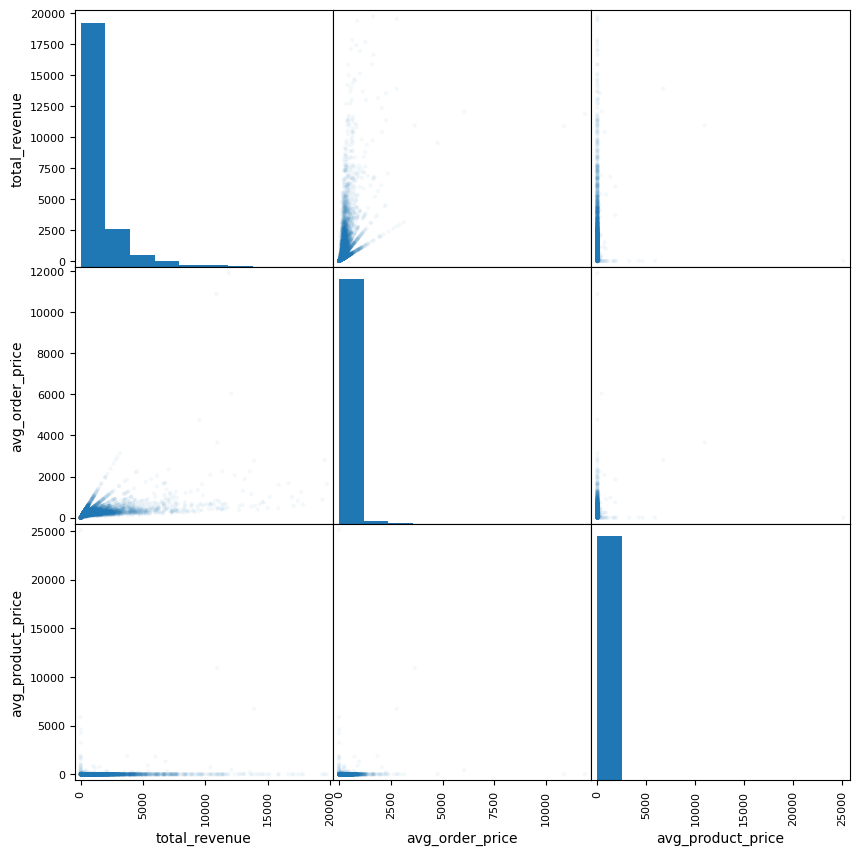

In [ ]:
# матрица рассеяния и гистограммы
from pandas.plotting import scatter_matrix
scatter_matrix(grouped_by_customers[col], alpha=0.05, figsize=(10, 10));

In [ ]:
grouped_by_customers[col].corr() # посмотрим на парные корреляции

,total_revenue,avg_order_price,avg_product_price
total_revenue,1.000000,0.439407,0.037040
avg_order_price,0.439407,1.000000,0.060096
avg_product_price,0.037040,0.060096,1.000000


Как видим связь у нас слабая.Для оценки зависимости лучше использовать phik который детектек не только линейную связь.

In [ ]:
phik_overview = grouped_by_customers[col].phik_matrix()

interval columns not set, guessing: ['total_revenue', 'avg_order_price', 'avg_product_price']


In [ ]:
phik_overview

,total_revenue,avg_order_price,avg_product_price
total_revenue,1.000000,0.443993,0.349032
avg_order_price,0.443993,1.000000,0.672173
avg_product_price,0.349032,0.672173,1.000000


<Axes: >

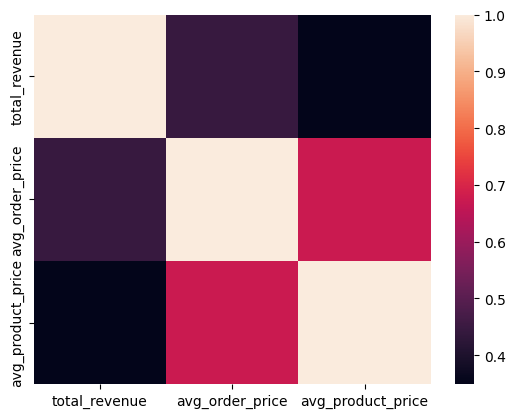

In [ ]:
sns.heatmap(phik_overview)

Как видим Phik показывает более сильную зависимость переменных.

In [ ]:
# загружаем библиотеку препроцесинга данных
# эта библиотека автоматически приведен данные к нормальным значениям
from sklearn import preprocessing
dataNorm = preprocessing.MinMaxScaler().fit_transform(grouped_by_customers[col].values)

In [ ]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
# Вычисляется евклидово расстояние (по умолчанию)
data_dist = pdist(dataNorm, 'euclidean')
# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в
# специальной переменной (используется ниже для визуализации
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

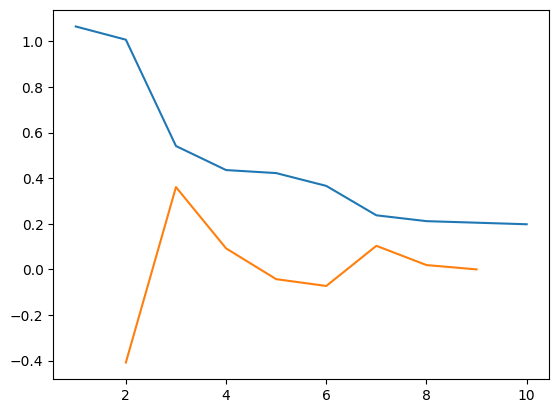

Рекомендованное количество кластеров: 3


In [ ]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Рекомендованное количество кластеров:", k)

Суть метода локтя заключается в подсчете внутрикластерной дисперсии и выборе минимальной.(Максимальной с точки зрения снижения) Внутрекластерная дисперсия это растояние от каждой точки до центроиды.

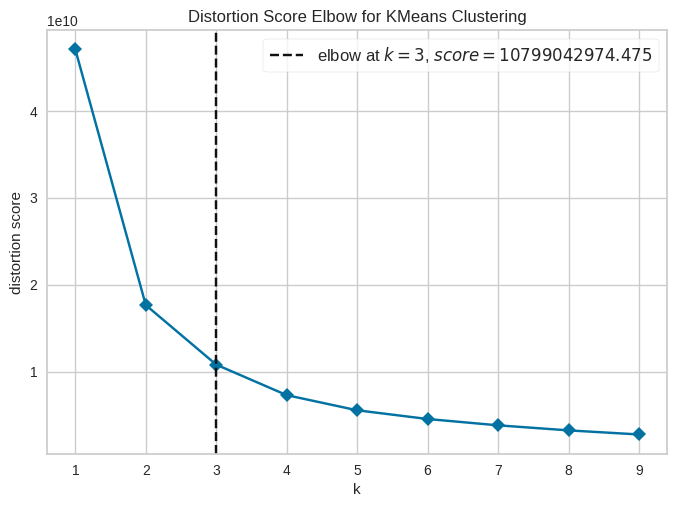

In [ ]:
from sklearn.cluster import KMeans as sk_KMeans
from yellowbrick.cluster import KElbowVisualizer
model = sk_KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(data_linkage)
visualizer.show();

In [ ]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
nClust=3

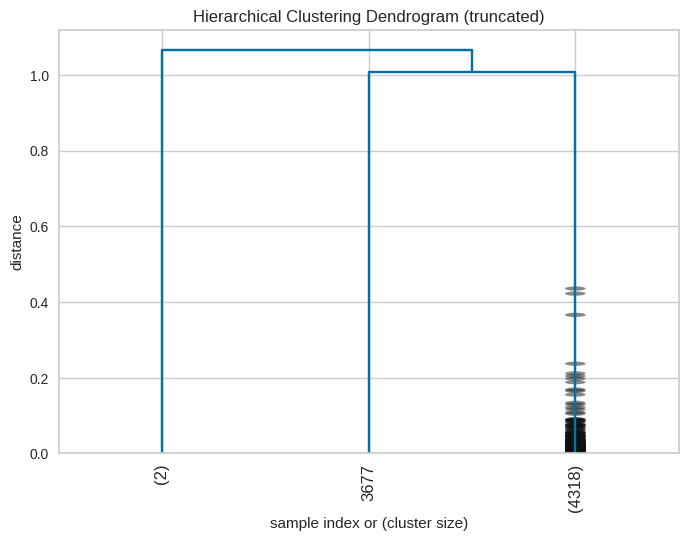

In [ ]:
#строим дендрограмму
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nClust,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

*Исходя из дендограммы 3 кластера также выглядят оптимально.Если поставит 5 видим что растояние увеличилось между кластерами.*

In [ ]:
# иерархическая кластеризация
clusters=fcluster(data_linkage, nClust, criterion='maxclust')

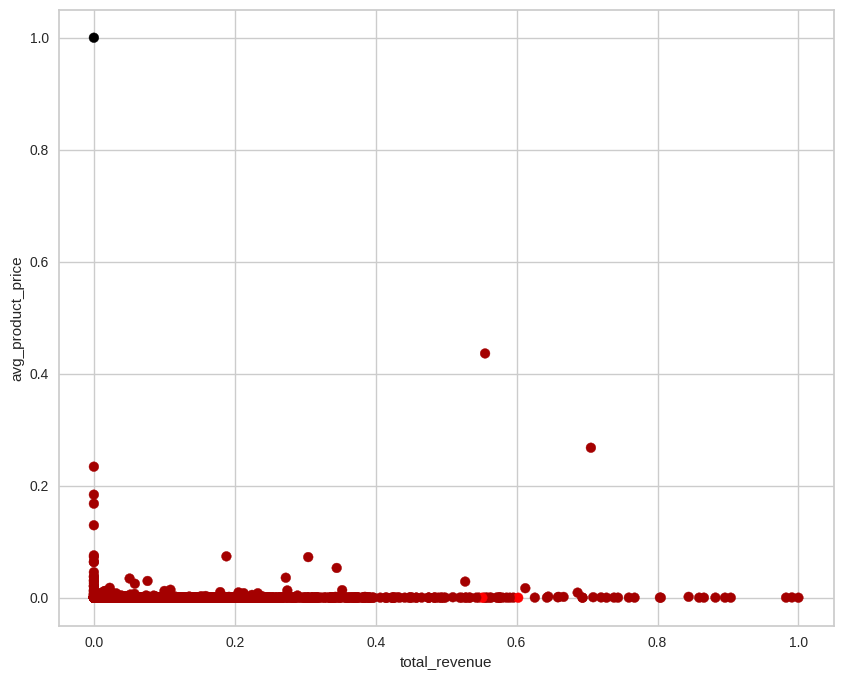

In [ ]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=2 #
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
# к оригинальным данным добавляем номер кластера
grouped_by_customers ['I']=clusters
res=grouped_by_customers.groupby('I')[col].mean()
res['Количество']=grouped_by_customers.groupby('I').size().values
res #ниже средние цифры по кластерам и количество объектов (Количество)

,total_revenue,avg_order_price,avg_product_price,Количество
I,,,,
1,11379.0100,11379.010000,0.403792,2
2,1397.4973,300.043815,19.825030,4318
3,0.0000,0.000000,25111.090000,1


In [ ]:
grouped_by_customers[grouped_by_customers['I']==3] # !!!!! меняйте номер кластера

,Customer ID,cnt_orders,avg_products_in_order,avg_goods_in_order,avg_product_price,total_revenue,avg_order_price,I
3677,17399.0,1,1.0,0.0,25111.09,0.0,0.0,3


In [ ]:
# строим кластеризаци методом KMeans
km = KMeans(n_clusters=nClust).fit(dataNorm)

In [ ]:
# выведем полученное распределение по кластерам
# так же номер кластера, к котрому относится строка, так как нумерация начинается с нуля, выводим добавляя 1
kmdata= km.labels_ +1
kmdata

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

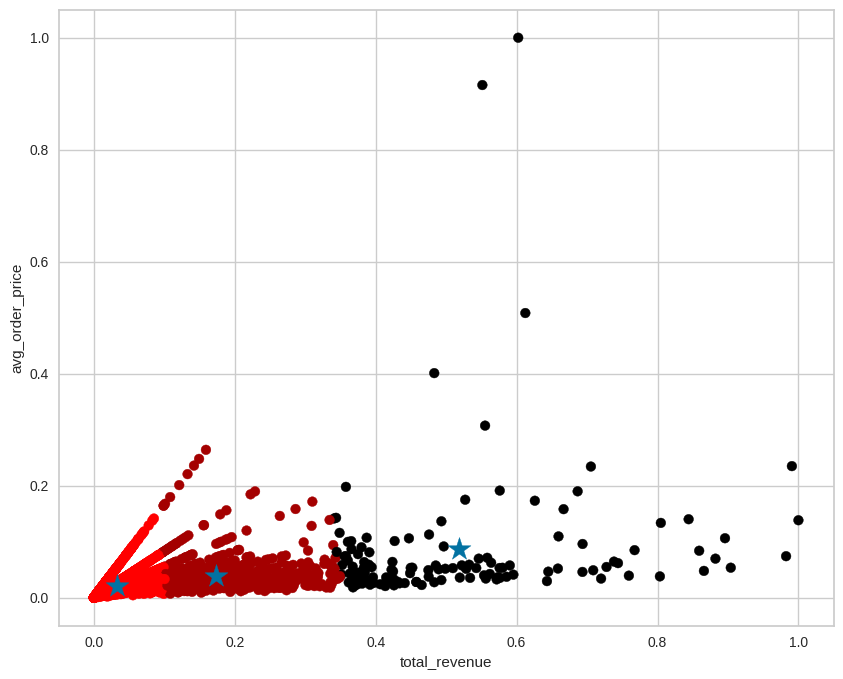

In [ ]:
x=0 # Чтобы построить диаграмму в разных осях, меняйте номера столбцов
y=1 #
centroids = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,x], dataNorm[:,y], c=km.labels_, cmap='flag')
plt.scatter(centroids[:, x], centroids[:, y], marker='*', s=300,
            c='b', label='centroid')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [ ]:
# к оригинальным данным добавляем номера кластеров
grouped_by_customers['KMeans']=km.labels_+1
res=grouped_by_customers.groupby('KMeans')[col].mean()
res['Количество']=grouped_by_customers.groupby('KMeans').size().values
res

,total_revenue,avg_order_price,avg_product_price,Количество
KMeans,,,,
1,638.670487,246.025918,22.903654,3454
2,3422.840364,454.262264,13.625199,737
3,10219.616538,1029.095414,165.887553,130


In [ ]:
grouped_by_customers[grouped_by_customers['KMeans']==2] # изменяйте номер кластера, содержание которого хотите просмотреть

,Customer ID,cnt_orders,avg_products_in_order,avg_goods_in_order,avg_product_price,total_revenue,avg_order_price,I,KMeans
3,12349.0,4,26.750000,248.250000,54.450273,2671.14,667.785000,2,2
8,12356.0,3,28.000000,608.666667,3.351661,3562.25,1187.416667,2,2
10,12358.0,3,19.333333,277.000000,4.301494,2719.01,906.336667,2,2
11,12359.0,8,15.125000,141.250000,3.688308,2563.36,320.420000,2,2
19,12371.0,3,34.666667,281.666667,4.693401,2179.42,726.473333,2,2
...,...,...,...,...,...,...,...,...,...
4278,18231.0,24,10.958333,87.583333,4.267464,4797.70,199.904167,2,2
4287,18245.0,15,19.066667,220.666667,2.363605,3757.92,250.528000,2,2
4295,18257.0,6,27.500000,221.333333,3.171011,2262.52,377.086667,2,2
4296,18258.0,8,6.625000,247.625000,2.772114,2059.67,257.458750,2,2


In [ ]:
grouped_by_customers[grouped_by_customers['KMeans']==3][['Customer ID', 'cnt_orders', 'avg_products_in_order', 'avg_goods_in_order', 'avg_product_price', 'total_revenue',
       'avg_order_price']]

,Customer ID,cnt_orders,avg_products_in_order,avg_goods_in_order,avg_product_price,total_revenue,avg_order_price
9,12357.0,2,82.500000,1939.500000,426.663537,12079.99,6039.995000
26,12380.0,10,17.800000,222.800000,339.370633,6951.49,695.149000
45,12409.0,6,26.333333,1265.333333,4.542791,12346.62,2057.770000
51,12415.0,7,30.285714,2010.428571,12.187994,19543.84,2791.977143
65,12433.0,6,47.833333,1007.500000,26.847793,7205.39,1200.898333
...,...,...,...,...,...,...,...
4182,18087.0,17,5.176471,227.529412,3.391557,10705.80,629.752941
4186,18092.0,9,6.888889,508.666667,2.979845,7111.18,790.131111
4272,18223.0,25,14.120000,147.840000,3.338518,7516.31,300.652400
4273,18225.0,19,16.736842,213.684211,4.130676,7545.14,397.112632


**Вывод**: как мы видим, три кластера, сформированные моделями KMeans и иерхарирической кластеризации, имеют примерно одинаковый размер 1 большой кластер и 2 поменьше. K-means удалось чуть лучше сегментировать. Исходя из этого, мы можем понять, что полученные сегменты клиентов более или менее одинаковы, независимо от того, какой алгоритм мы используем.

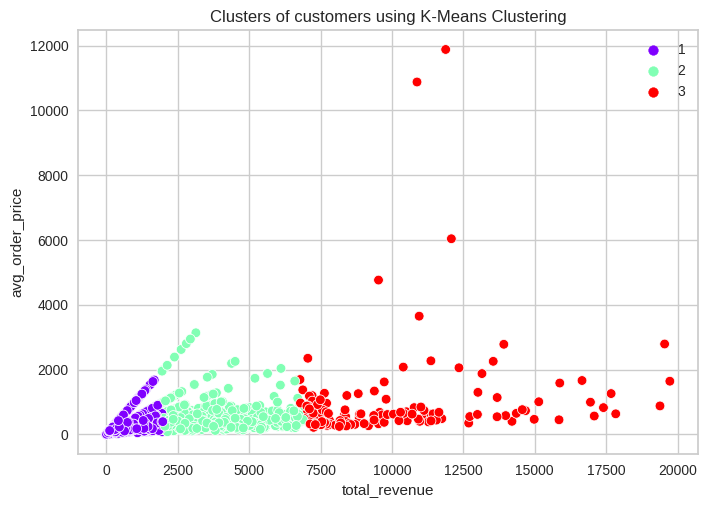

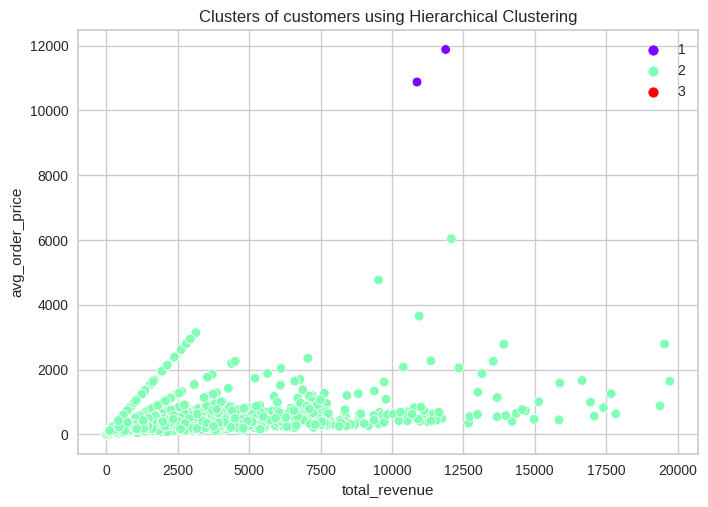

In [ ]:
sns.scatterplot(data=grouped_by_customers, x="total_revenue", y="avg_order_price", hue=kmdata, palette="rainbow").set_title('Clusters of customers using K-Means Clustering')
plt.show()
sns.scatterplot(data=grouped_by_customers, x="total_revenue", y="avg_order_price", hue=clusters, palette="rainbow").set_title('Clusters of customers using Hierarchical Clustering')
plt.show()


Сравним поведение покупателей из разных кластеров после сегментации


In [ ]:
grouped_by_customers

,Customer ID,cnt_orders,avg_products_in_order,avg_goods_in_order,avg_product_price,total_revenue,avg_order_price,I,KMeans
0,12346.0,15,3.066667,4.666667,12.346667,372.86,24.857333,2,1
1,12347.0,2,35.500000,414.000000,2.362000,1323.32,661.660000,2,1
2,12348.0,1,20.000000,373.000000,0.719500,222.16,222.160000,2,1
3,12349.0,4,26.750000,248.250000,54.450273,2671.14,667.785000,2,2
4,12351.0,1,21.000000,261.000000,2.355238,300.93,300.930000,2,1
...,...,...,...,...,...,...,...,...,...
4316,18283.0,6,38.333333,56.000000,2.460011,641.77,106.961667,2,1
4317,18284.0,2,14.500000,247.000000,14.126607,461.68,230.840000,2,1
4318,18285.0,1,12.000000,145.000000,8.350000,427.00,427.000000,2,1
4319,18286.0,3,23.333333,202.666667,5.914784,1296.43,432.143333,2,1


In [ ]:
orders1_filt_clust = grouped_by_customers.groupby('KMeans')\
.agg({'Customer ID':'nunique', 'avg_products_in_order':'mean', 'avg_goods_in_order':'mean', 'cnt_orders':'sum', 'avg_product_price':'mean',
      'total_revenue':'sum','avg_order_price':'mean'})\
.reset_index().rename(columns={'Customer ID':'n_buyers'})

In [ ]:
orders1_filt_clust['avg_orders_per_buyer'] = round(orders1_filt_clust['cnt_orders']/orders1_filt_clust['n_buyers'],0)
orders1_filt_clust['avg_bill'] = orders1_filt_clust['total_revenue'] / orders1_filt_clust['cnt_orders']
orders1_filt_clust['avg_goods_per_buyer'] = round(orders1_filt_clust['avg_goods_in_order'] / orders1_filt_clust['n_buyers'], 0)

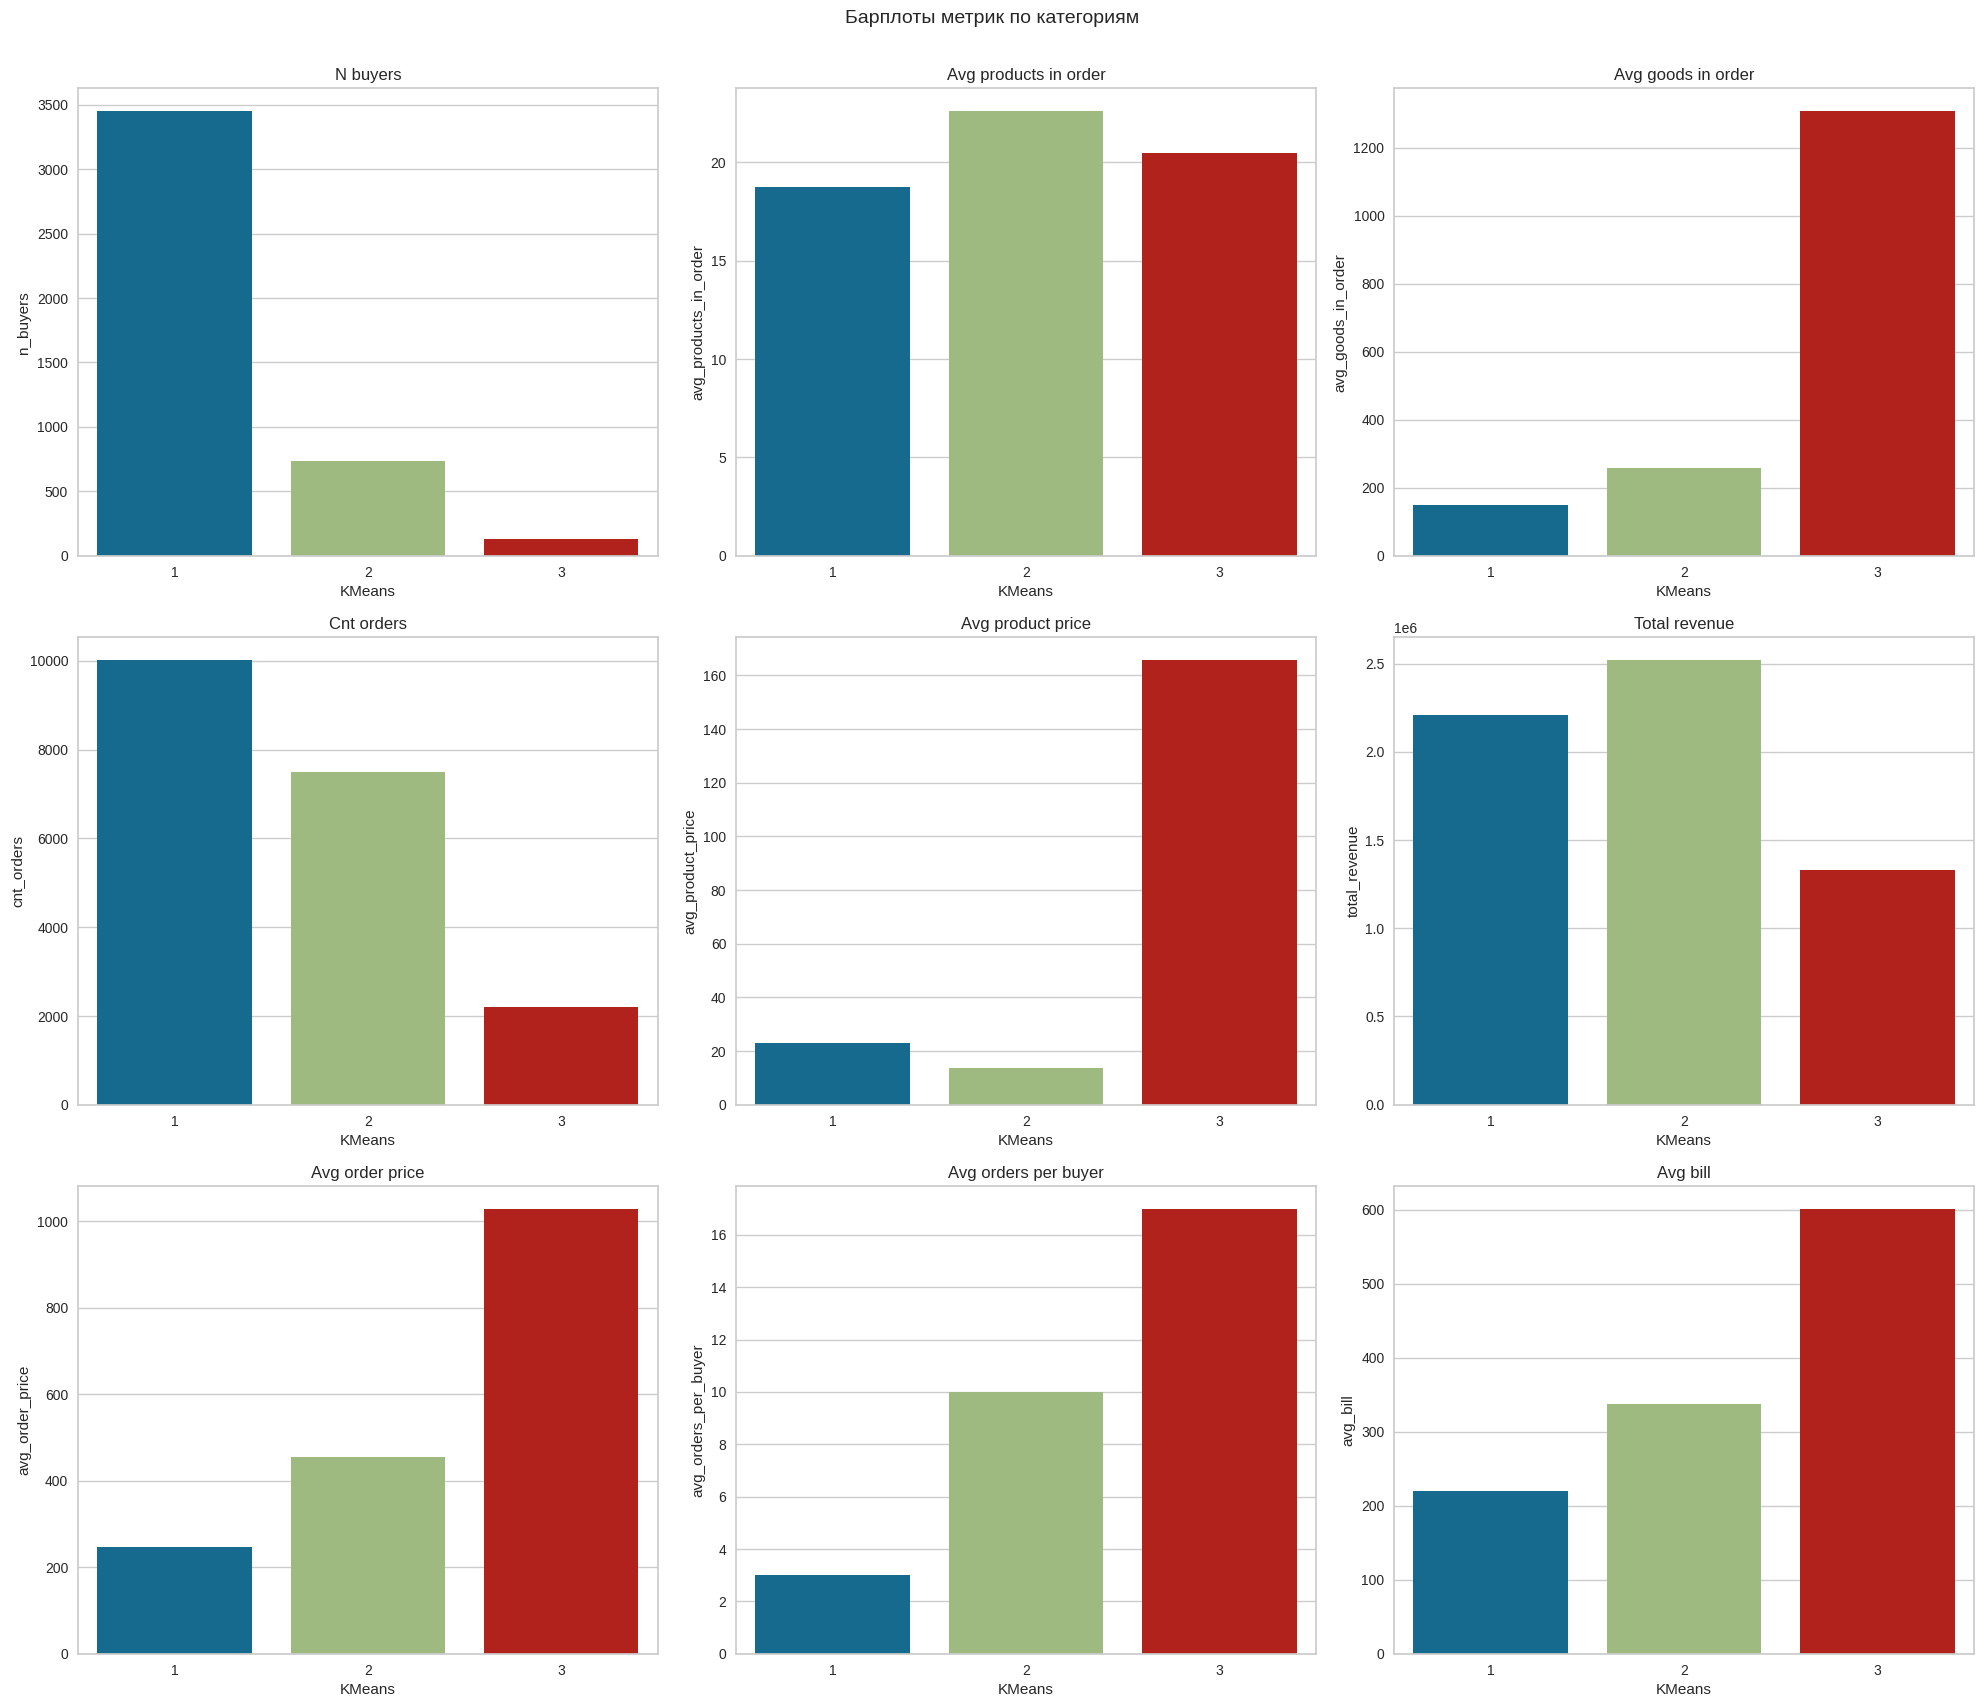

In [ ]:
WIDTH = 3
plot_amount = len(orders1_filt_clust.columns)
height = plot_amount//WIDTH

fig, axs = plt.subplots(height, WIDTH, figsize=(20, 17))
fig.suptitle('Барплоты метрик по категориям',  y=1.003, size=14)

for item, ax in zip(orders1_filt_clust.columns[1:], np.ravel(axs)):
    sns.barplot(data = orders1_filt_clust, x='KMeans', y=item, ax=ax)
    ax.set_title(item.capitalize().replace('_', ' '), size=12)

plt.tight_layout()
plt.show()

**Вывод**: можем наблюдать  по совокупной выручке и количеству позиций лидирует 2 кластер. При этом по среднему чеку,по по количеству заказов на покупателя,по средней цене заказа, по количеству в заказе лидирует 3 кластер. Соотвественно,компании можно рекомендовать уделять внимание 2 кластер так как он приносит больше выручки,при это количество покупателей среднее,и количество заказов. Это условно лояльные клиенты которые заказывают несколько позиций разных товаров но в небольшом количестве и с низкой средней ценой.

#Классификация товаров на категории


У нас имеються названия товаров, но нет категорий. Это можно решить с помщью моделей NLP. Например помощью библитеки BERtopic которая разделит наименование заказа на слова,а затем подсчитает наиболее часто встречаемые, которые мы уже можем использовать как категории.

In [ ]:
df_filtered

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price,month,year
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,12,2009
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,12,2009
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,12,2009
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,12,2009
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,feltcraft doll rosie,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90,12,2010
525457,538171,22750,feltcraft princess lola doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525458,538171,22751,feltcraft princess olivia doll,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75,12,2010
525459,538171,20970,pink floral feltcraft shoulder bag,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50,12,2010


In [ ]:
model = BERTopic(verbose=True)

#convert to list
sampl = df_filtered.iloc[0:300000].astype(str)
docs = sampl['Description'].to_list()

topics, probabilities = model.fit_transform(docs)
model.get_topic_freq()

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/9375 [00:00<?, ?it/s]

2023-11-22 03:36:40,075 - BERTopic - Transformed documents to Embeddings
2023-11-22 03:56:31,350 - BERTopic - Reduced dimensionality
2023-11-22 03:57:24,311 - BERTopic - Clustered reduced embeddings


,Topic,Count
362,-1,3008
57,0,1870
2455,1,1281
4,2,1128
411,3,973
...,...,...
2658,3043,11
1932,3044,11
2243,3045,10
2273,3046,10


In [ ]:
model.visualize_barchart()

In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,2003,-1_ladder_spots_plant_gardeners,"[ladder, spots, plant, gardeners, kneeling, et...","[white wood garden plant ladder, white wood ga..."
1,0,2381,0_tlight_holder_hanging_white,"[tlight, holder, hanging, white, heart, , , , , ]","[white hanging heart t-light holder, white han..."
2,1,1281,1_cakestand_regency_tier_,"[cakestand, regency, tier, , , , , , , ]","[regency cakestand 3 tier, regency cakestand 3..."
3,2,1128,2_trinket_strawberry_ceramic_box,"[trinket, strawberry, ceramic, box, , , , , , ]","[strawberry ceramic trinket box, strawberry ce..."
4,3,1000,3_72_cases_retro_spot,"[72, cases, retro, spot, pack, cake, of, , , ]","[pack of 72 retro spot cake cases, pack of 72 ..."
...,...,...,...,...,...
3042,3041,10,3041_zinc_decoration_metal_heart,"[zinc, decoration, metal, heart, , , , , , ]","[zinc metal heart decoration, zinc metal heart..."
3043,3042,10,3042_drawing_slate_magic_spaceboy,"[drawing, slate, magic, spaceboy, , , , , , ]","[magic drawing slate spaceboy , magic drawing ..."
3044,3043,10,3043_spots_bunting_retro_paper,"[spots, bunting, retro, paper, , , , , , ]","[paper bunting retro spots, paper bunting retr..."
3045,3044,10,3044_classic_frame_white_,"[classic, frame, white, , , , , , , ]","[classic white frame, classic white frame, cla..."


In [ ]:
#исходя из топиков можно выделить следующие категории
food_and_fruits = ['strawberry', 'cake','lunch','teatime','baking']
furniture_instruments = ['door','home','building','ceramic','flight','mat']
home = ['holder','trinket','flag','cakestand']
bags = ['bag','box','pack']

In [ ]:
#функцию, которая определит наличие ключевого слова в названии товара и отнесёт товар к одной из категорий:
def to_category(product_name):
    if any(i in product_name.lower() for i in food_and_fruits):
        return 'food_and_fruits'
    elif any(i in product_name.lower() for i in furniture_instruments):
        return 'furniture_instruments'
    elif any(i in product_name.lower() for i in home):
        return 'home'
    elif any(i in product_name.lower() for i in bags):
        return 'bags'
    else:
        return 'other'

In [ ]:
#добавим категорию в данные
sampl['product_category'] = sampl['Description'].apply(to_category)

In [ ]:
#количество заказов каждой категории
categories_amount = sampl.groupby(['Description','product_category'])[['Invoice']].nunique().reset_index()\
.groupby('product_category', as_index=False)['Description'].count().sort_values('Description', ascending=False)
categories_amount['percent_of_products'] = (categories_amount['Description']/categories_amount['Description'].sum()).map('{:.2%}'.format)
categories_amount


,product_category,Description,percent_of_products
4,other,3386,79.00%
0,bags,377,8.80%
1,food_and_fruits,196,4.57%
2,furniture_instruments,183,4.27%
3,home,144,3.36%


In [ ]:
#выручка и % по категориям
sampl['total_price'] = pd.to_numeric(sampl['total_price'], errors='coerce').fillna(0).astype(np.int64)
categories_revenue = sampl.groupby('product_category')['total_price'].sum().reset_index().rename(columns={'total_price':'revenue'})\
.groupby('product_category', as_index=False)['revenue'].sum().sort_values('product_category', ascending=False)
categories_revenue['percent_of_products'] = (categories_revenue['revenue']/categories_revenue['revenue'].sum()).map('{:.2%}'.format)
categories_revenue

,product_category,revenue,percent_of_products
4,other,3240967,65.02%
3,home,317959,6.38%
2,furniture_instruments,337426,6.77%
1,food_and_fruits,546536,10.96%
0,bags,541869,10.87%


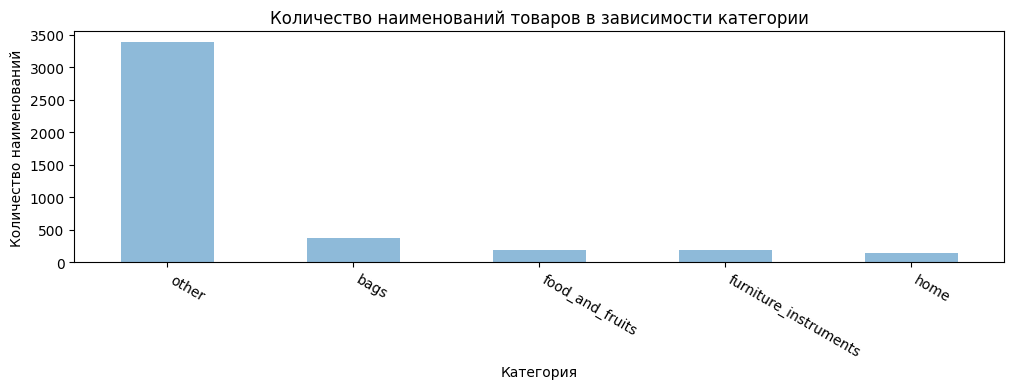

In [ ]:
categories_amount.plot(x='product_category', y='Description', kind='bar', figsize=(12, 3), legend=False, alpha=.5)
plt.title("Количество наименований товаров в зависимости категории")
plt.xlabel("Категория")
plt.ylabel("Количество наименований")
plt.xticks(rotation=-30, ha='left')
plt.show()

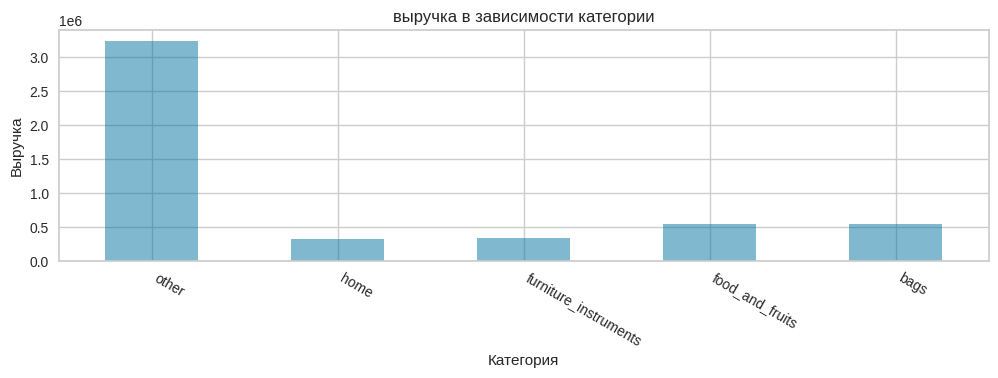

In [ ]:
categories_revenue.plot(x='product_category', y='revenue', kind='bar', figsize=(12, 3), legend=False, alpha=.5)
plt.title("выручка в зависимости категории")
plt.xlabel("Категория")
plt.ylabel("Выручка")
plt.xticks(rotation=-30, ha='left')
plt.show()

*Выделение сегментов заказов прошло не очень удачно более половины всех заказов относятся к категории others*

Анализ категорий от времени

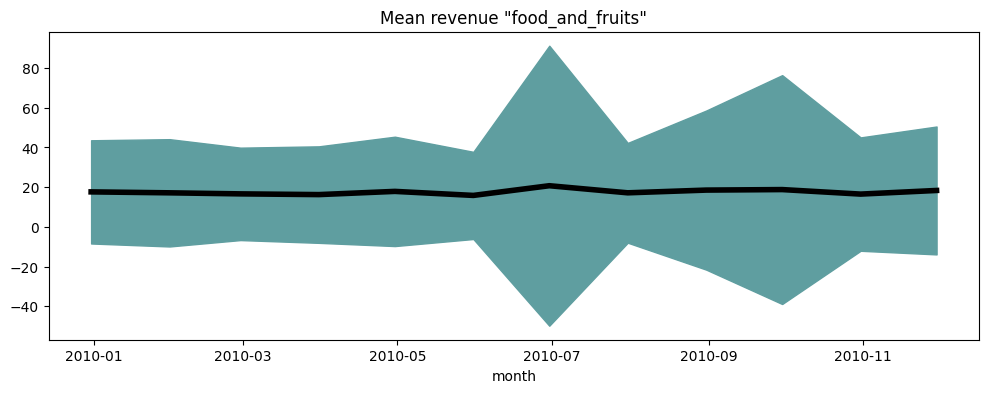

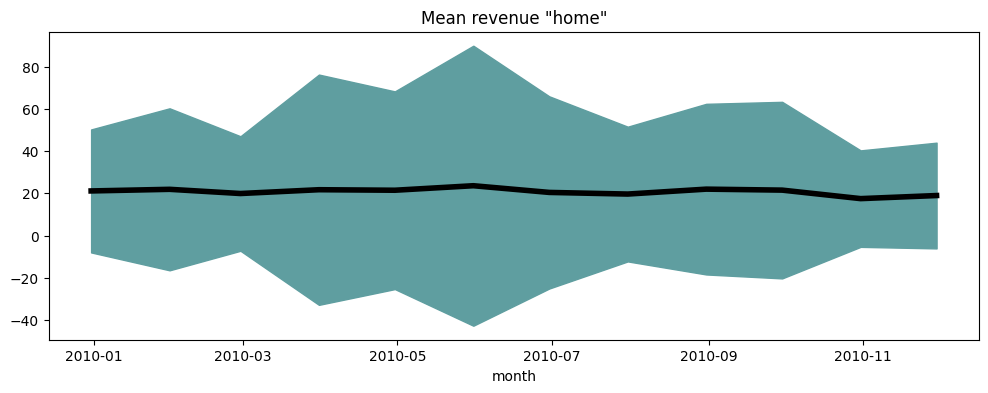

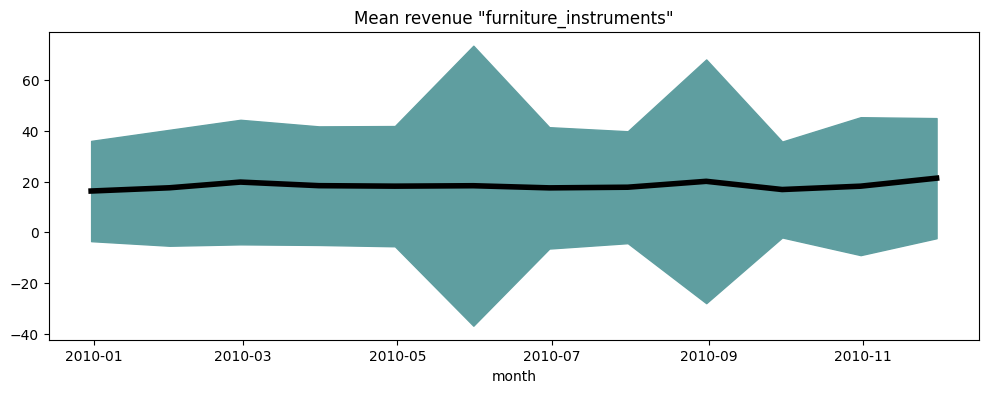

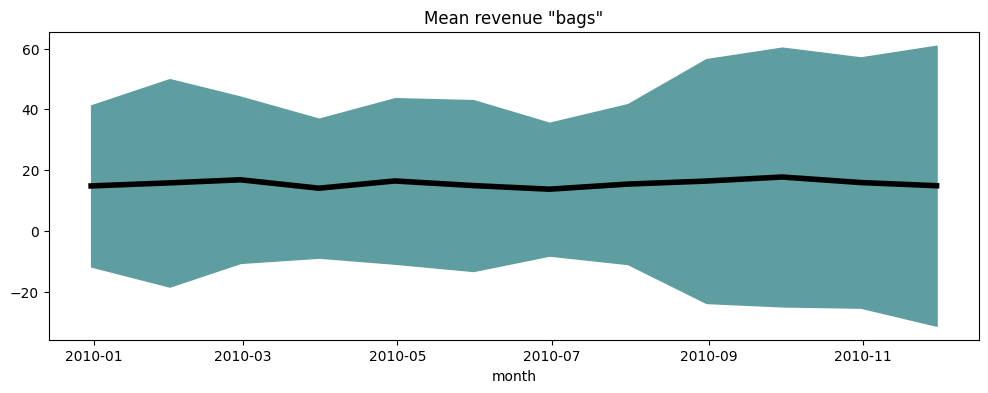

In [ ]:
sampl['InvoiceDate'] = pd.to_datetime(sampl['InvoiceDate'])

# group by "X" column
groups = sampl.groupby('product_category')

# extract keys from groups
keys = sampl['product_category'].unique()
keys = keys[keys != 'other'] #уберем категорию others

for i in keys:
    sampl_for_merge_product = groups.get_group(i)
    series_mean = sampl_for_merge_product[['InvoiceDate','total_price']].groupby(pd.Grouper(key ='InvoiceDate',freq = 'M')).mean()
    series_std = sampl_for_merge_product[['InvoiceDate','total_price']].groupby(pd.Grouper(key ='InvoiceDate',freq = 'M')).std().fillna(0)
    f, ax = plt.subplots(1, 1, figsize = (12, 4))
    ax.plot(series_mean, linewidth=4, color = 'black')
    ax.fill_between(series_mean.index,
               (series_mean.values-series_std.values).ravel(),
               (series_mean.values+series_std.values).ravel(),
              color = 'cadetblue',alpha=1)
    ax.set_title(f'Mean revenue "{i}"')
    ax.set_xlabel('month')


**Вывод**:
Стандартное отклонение важно, потому что оно говорит нам, насколько разбросаны значения в данном наборе данных.
В результате можем выделить некоторые особенности стандрных отклонения выручек сегментов. У таких сегментов как furniture_instruments,food and fruits несколько периодов повышенной волотильности. Можно предположить что в данные месяца товар пользуется высоким спросом и выручка становиться выше средней. Интересный кейс у категории bags повышенная волотильность выруки наблюдается к концу года,что возможно связано с активностью покупателей в связи с новогодним праздникам. У всех категорий кроме bags повышенная волотильность в летние месяцы (6-7 месяца).

Сравним поведение покупателей из разных кластеров после сегментации


In [ ]:
df_seg_copy = sampl.copy()
index = df_seg_copy[df_seg_copy['product_category'] == 'other'].index
df_seg_copy.drop(index, inplace=True)
df_seg_copy

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,total_price,month,year,product_category
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30,12,2009,food_and_fruits
5,489434,22064,pink doughnut trinket pot,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39,12,2009,home
7,489434,21523,fancy font home sweet home doormat,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59,12,2009,furniture_instruments
11,489435,22353,lunchbox with cutlery fairy cakes,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30,12,2009,food_and_fruits
38,489437,35400,wooden box advent calendar,2,2009-12-01 09:08:00,8.95,15362.0,United Kingdom,17,12,2009,bags
...,...,...,...,...,...,...,...,...,...,...,...,...
437450,531240,22379,recycling bag retrospot,10,2010-11-07 10:43:00,2.1,16746.0,United Kingdom,21,11,2010,bags
437454,531240,20971,pink blue felt craft trinket box,12,2010-11-07 10:43:00,1.25,16746.0,United Kingdom,15,11,2010,home
437455,531240,20972,pink cream felt craft trinket box,12,2010-11-07 10:43:00,1.25,16746.0,United Kingdom,15,11,2010,home
437460,531240,22956,36 foil heart cake cases,1,2010-11-07 10:43:00,2.1,16746.0,United Kingdom,2,11,2010,food_and_fruits


Сгруппируем получившуюся таблицу по кластерам и найдем метрики: среднее количество заказов, среднее количество купленных товаров на одного покупателя, средний чек, суммарную выручку.

In [ ]:
df_seg_copy['Price'] = pd.to_numeric(df_seg_copy['Price'], errors='coerce').fillna(0).astype(np.int64)
df_seg_copy['Quantity'] = pd.to_numeric(df_seg_copy['Quantity'], errors='coerce').fillna(0).astype(np.int64)
orders_filt_clust = df_seg_copy.groupby('product_category')\
.agg({'Customer ID':'nunique', 'Invoice':'nunique', 'Description':'count', 'Quantity':'sum', 'Price':'mean',
      'total_price':'sum'})\
.reset_index().rename(columns={'Customer ID':'n_buyers', 'Invoice':'cnt_orders', 'Description':'cnt_products_in_order',
                               'Quantity':'cnt_goods_in_order','Price':'avg_price','total_price':'revenue'})


In [ ]:
orders_filt_clust['avg_orders_per_buyer'] = round(orders_filt_clust['cnt_orders']/orders_filt_clust['n_buyers'],0)
orders_filt_clust['avg_bill'] = orders_filt_clust['revenue'] / orders_filt_clust['cnt_orders']
orders_filt_clust['avg_goods_per_buyer'] = round(orders_filt_clust['cnt_goods_in_order'] / orders_filt_clust['n_buyers'], 0)

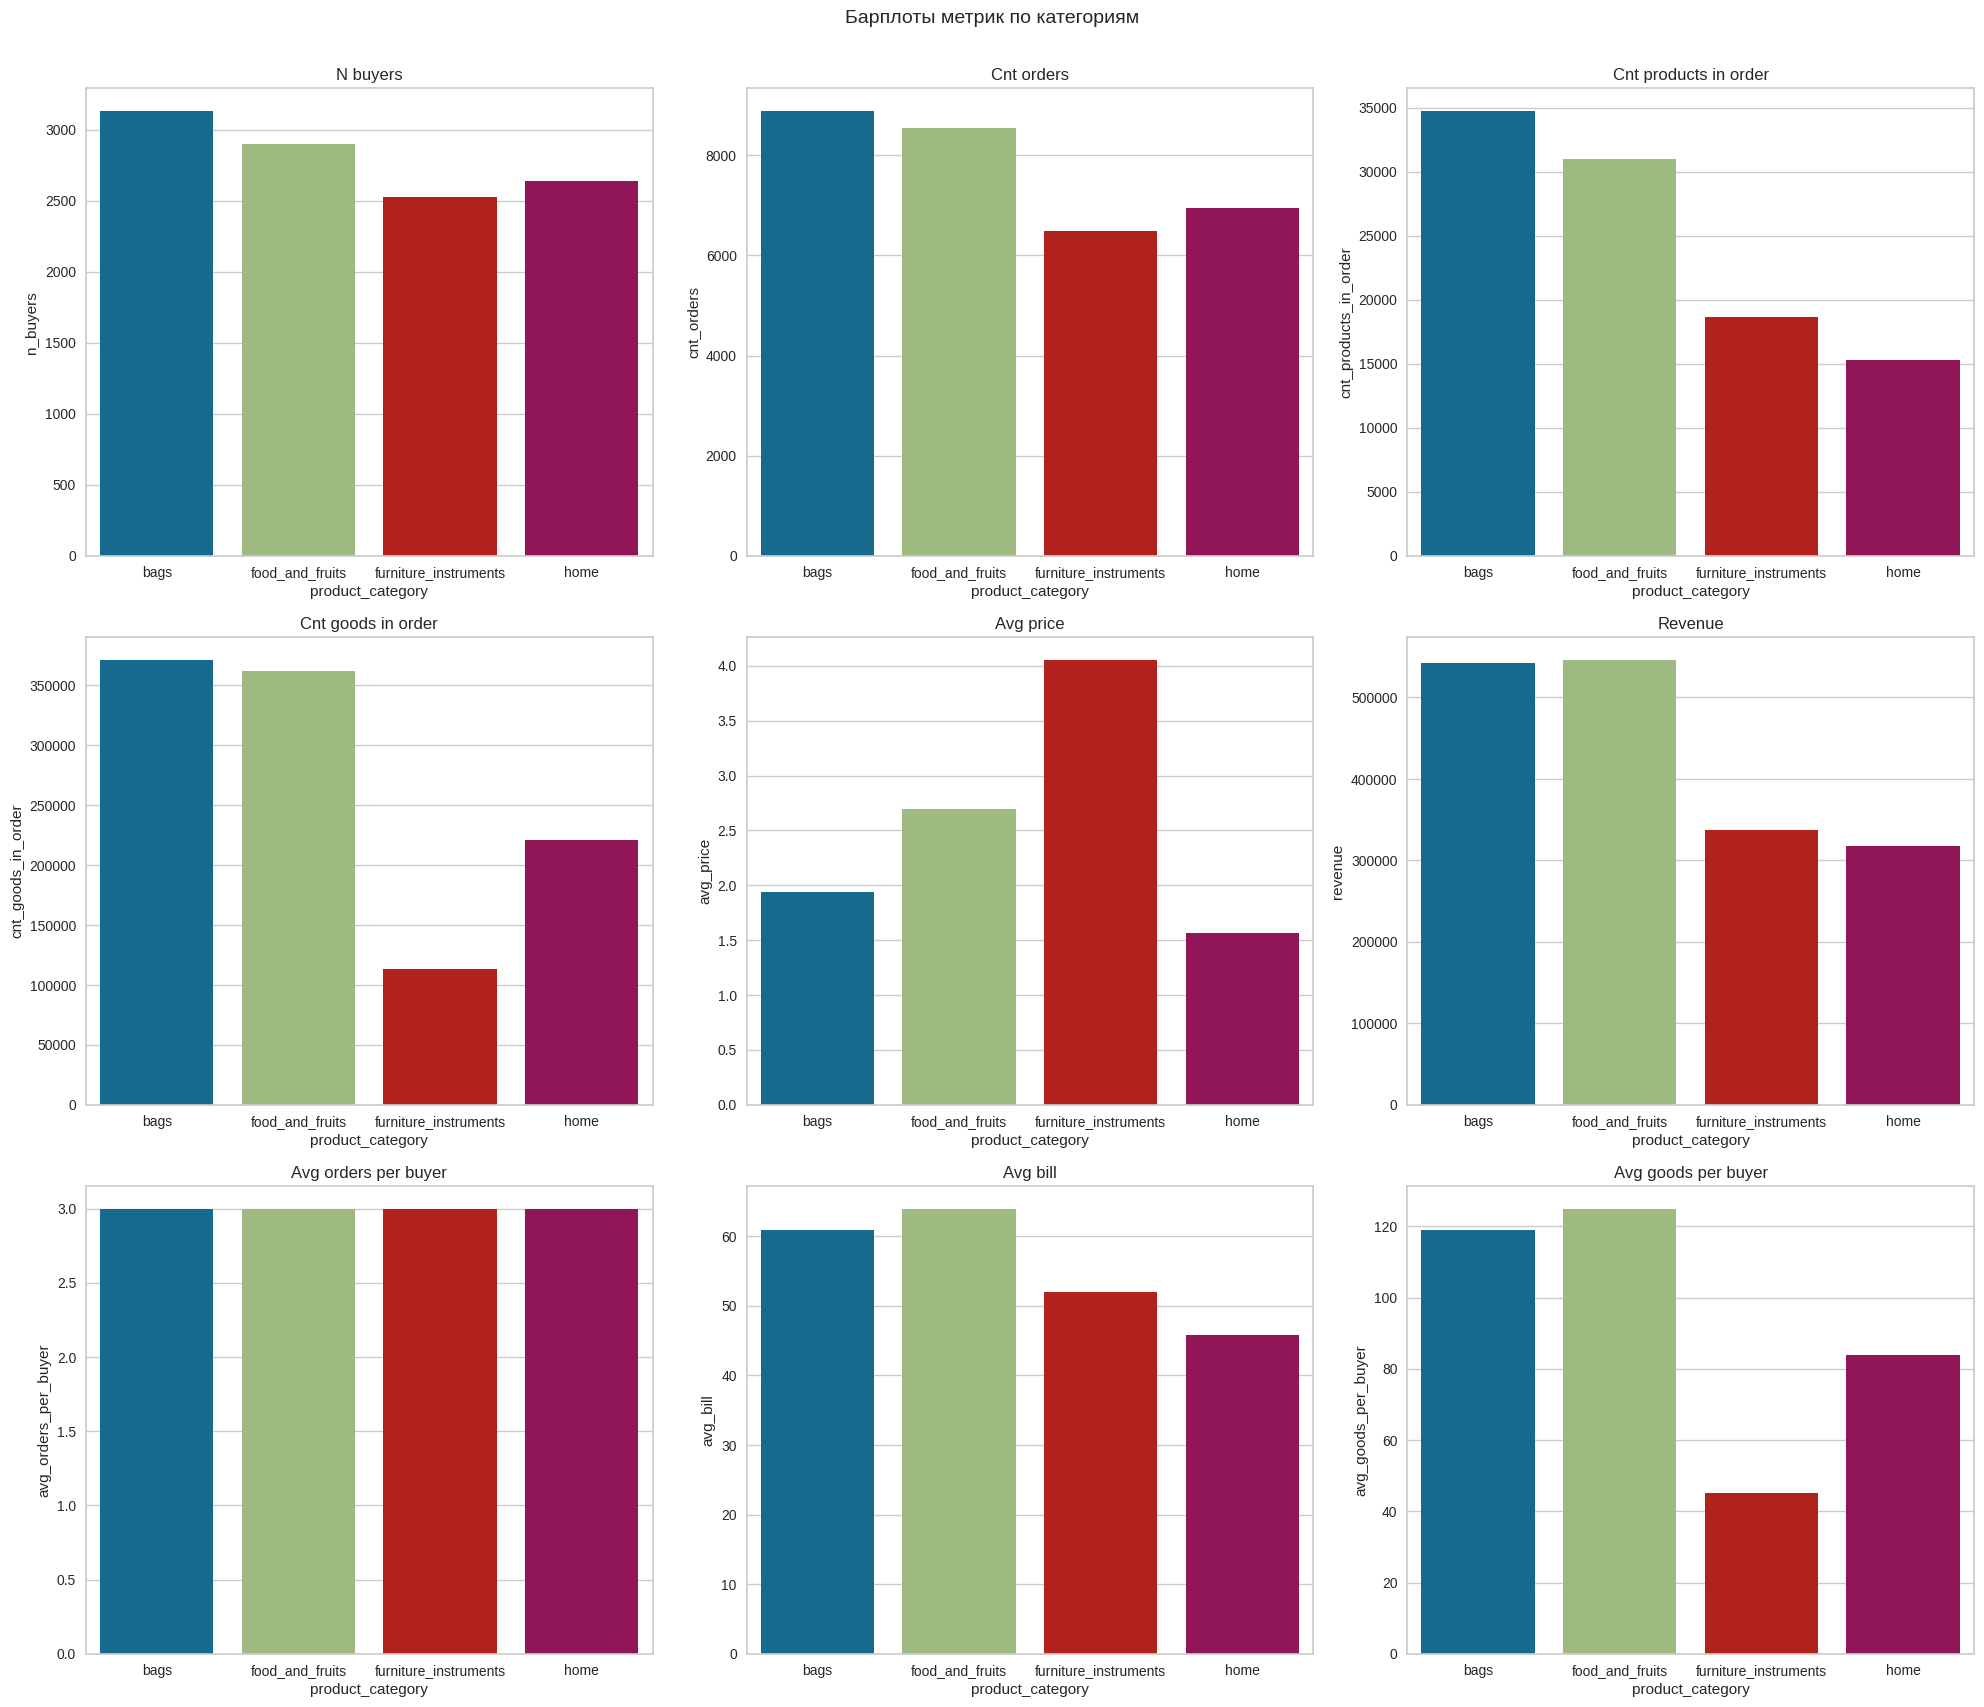

In [ ]:
WIDTH = 3
plot_amount = len(orders_filt_clust.columns)
height = plot_amount//WIDTH

fig, axs = plt.subplots(height, WIDTH, figsize=(20, 17))
fig.suptitle('Барплоты метрик по категориям',  y=1.003, size=14)

for item, ax in zip(orders_filt_clust.columns[1:], np.ravel(axs)):
    sns.barplot(data = orders_filt_clust, x='product_category', y=item, ax=ax)
    ax.set_title(item.capitalize().replace('_', ' '), size=12)

plt.tight_layout()
plt.show()

**Вывод**: исходя из данных можно выделить 2 основных сегмента bags и food-and_fruits,которые лидируют по большинству показателей: кол-во покупателей, кол-во заказов,количество продуктов в заказах, выручка, средний чек, среднее количеством товаров на покупателя. Соответственно за данными сегментами компаниии нужно следить.